In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("ml").getOrCreate()

In [ ]:
#spark.stop()

In [30]:
df = spark.read.csv("/common_folder/nyc_parking/Parking_Violations_Issued_-_Fiscal_Year_2017.csv",header=True)

df.createOrReplaceTempView("dfTable")

In [31]:
df.show(5)

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons Number|Plate ID|Registration State|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|    5092469481| GZH7067|                NY|2016-07-10|             7|             SUBN|       TOYOT|                 0|              0|         0143A|
|    5092451658| GZH7067|                NY|2016-07-08|             7|             SUBN|       TOYOT|                 0|              0|         0400P|
|    4006265037| FZX9232|                NY|2016-08-23|             5|             SUBN|        FORD|                 0|              0|         0233P|
|    8478629828| 66623ME|                NY|2017-06-14|            47|             REFG|

In [4]:
from pyspark.sql.functions import min, max

# Examine the data

In [3]:
df2=spark.sql("SELECT *  FROM dfTable")

In [6]:
df2.count()

10803028

In [7]:
df2.show(4)

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons Number|Plate ID|Registration State|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|    5092469481| GZH7067|                NY|2016-07-10|             7|             SUBN|       TOYOT|                 0|              0|         0143A|
|    5092451658| GZH7067|                NY|2016-07-08|             7|             SUBN|       TOYOT|                 0|              0|         0400P|
|    4006265037| FZX9232|                NY|2016-08-23|             5|             SUBN|        FORD|                 0|              0|         0233P|
|    8478629828| 66623ME|                NY|2017-06-14|            47|             REFG|

In [32]:
df2=spark.sql("select * from dfTable where year(`Issue Date`)=2017")

In [33]:
#Find the total number of tickets for the year.
df2.count()

5431918

In [17]:
df2.show(5)

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons Number|Plate ID|Registration State|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|    8478629828| 66623ME|                NY|2017-06-14|            47|             REFG|       MITSU|                14|             14|         1120A|
|    5096917368| FZD8593|                NY|2017-06-13|             7|             SUBN|       ME/BE|                 0|              0|         0852P|
|    1407740258| 2513JMG|                NY|2017-01-11|            78|             DELV|       FRUEH|               106|            106|         0015A|
|    1413656420|T672371C|                NY|2017-02-04|            40|             TAXI|

In [ ]:
#Find out the number of unique states from where the cars that got parking tickets came. 
#(Hint: Use the column 'Registration State'.)

In [60]:
print( "Unique States: ",df2.select('Registration State').distinct().count() )

df2.groupBy('Registration State').count().sort('count',ascending=False).show()

Unique States:  65
+------------------+-------+
|Registration State|  count|
+------------------+-------+
|                NY|4273951|
|                NJ| 475825|
|                PA| 140286|
|                CT|  70403|
|                FL|  69468|
|                IN|  45525|
|                MA|  38941|
|                VA|  34367|
|                MD|  30213|
|                NC|  27152|
|                TX|  18827|
|                IL|  18666|
|                GA|  17537|
|                99|  16055|
|                AZ|  12379|
|                OH|  12281|
|                CA|  12153|
|                ME|  10806|
|                SC|  10395|
|                MN|  10083|
+------------------+-------+
only showing top 20 rows



In [34]:
df2 = df2.replace(["99","NY"], 'Registration State')

In [35]:
print( "Unique States: ",df2.select('Registration State').distinct().count() )

df2.groupBy('Registration State').count().sort('count',ascending=False).show()

Unique States:  64
+------------------+-------+
|Registration State|  count|
+------------------+-------+
|Registration State|4290006|
|                NJ| 475825|
|                PA| 140286|
|                CT|  70403|
|                FL|  69468|
|                IN|  45525|
|                MA|  38941|
|                VA|  34367|
|                MD|  30213|
|                NC|  27152|
|                TX|  18827|
|                IL|  18666|
|                GA|  17537|
|                AZ|  12379|
|                OH|  12281|
|                CA|  12153|
|                ME|  10806|
|                SC|  10395|
|                MN|  10083|
|                OK|   9088|
+------------------+-------+
only showing top 20 rows



# Aggregation tasks

In [ ]:
#How often does each violation code occur? Display the frequency of the top five violation codes.

In [36]:
df2.printSchema()

root
 |-- Summons Number: string (nullable = true)
 |-- Plate ID: string (nullable = true)
 |-- Registration State: string (nullable = true)
 |-- Issue Date: string (nullable = true)
 |-- Violation Code: string (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Make: string (nullable = true)
 |-- Violation Precinct: string (nullable = true)
 |-- Issuer Precinct: string (nullable = true)
 |-- Violation Time: string (nullable = true)



In [12]:
def null_value_count(df):
    null_columns_counts = []
    numRows = df.count()
    for k in df.columns:
        nullRows = df.where(df[k].isNull()).count()
        temp = k,nullRows
        null_columns_counts.append(temp)
    return(null_columns_counts)

null_columns_count_list = null_value_count(df2)

print("Null Value Columns")
null_columns_count_list

Null Value Columns


[('Summons Number', 0),
 ('Plate ID', 0),
 ('Registration State', 0),
 ('Issue Date', 0),
 ('Violation Code', 0),
 ('Vehicle Body Type', 0),
 ('Vehicle Make', 0),
 ('Violation Precinct', 0),
 ('Issuer Precinct', 0),
 ('Violation Time', 0)]

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df3=df2.select('Plate ID').groupBy('Plate ID').count().sort('count',ascending=False)
df_plate =df3.toPandas()[:50]
df_plate

,Plate ID,count
0,BLANKPLATE,5261
1,96089MA,529
2,96087MA,528
3,94905JA,527
4,14828MJ,526
5,85848MD,512
6,30954JX,510
7,2121796,507
8,16242TC,496
9,2194153,495


In [60]:
def bar_plot(df, X):
    plt.figure(figsize=(20,5))
    ax1=sns.barplot(x=X, y='count', data=df)

    plt.title(X)
    plt.ylabel("Count") 
    plt.xlabel(X) 

    sns.set_style("white")

    # Rotate the labels on x-axis
    for item in ax1.get_xticklabels():
        item.set_rotation(90)

    plt.show()

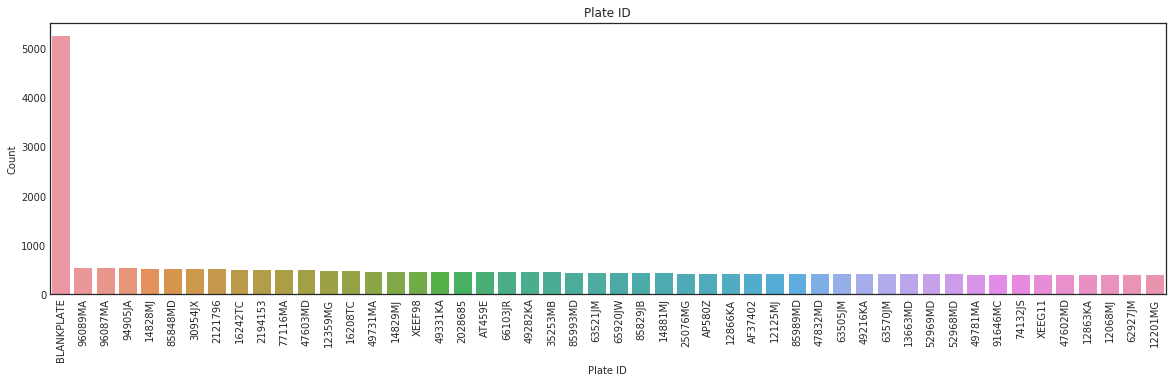

In [46]:
bar_plot(df_plate,"Plate ID")

In [54]:
df3=df2.select('Registration State').groupBy('Registration State').count().sort('count',ascending=False)
df_state =df3.toPandas()

In [58]:
df_state[:30]

,Registration State,count
0,Registration State,4290006
1,NJ,475825
2,PA,140286
3,CT,70403
4,FL,69468
5,IN,45525
6,MA,38941
7,VA,34367
8,MD,30213
9,NC,27152


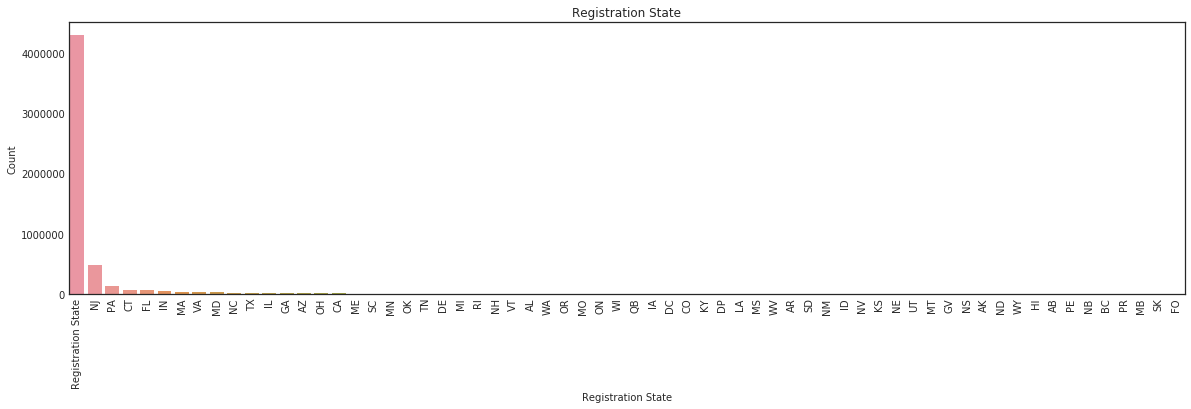

In [61]:
bar_plot(df_state,"Registration State")

In [89]:
from pyspark.sql.functions import date_trunc
from pyspark.sql.functions import dayofmonth, month, dayofweek

In [62]:
df3=df2.select('Summons Number').groupBy('Summons Number').count().sort('count',ascending=False)
df3.show(10)

+--------------+-----+
|Summons Number|count|
+--------------+-----+
|    4630528027|    1|
|    8524952829|    1|
|    7034999387|    1|
|    8558254059|    1|
|    7852198120|    1|
|    1418966861|    1|
|    8537769060|    1|
|    8498220300|    1|
|    8498608545|    1|
|    1418013500|    1|
+--------------+-----+
only showing top 10 rows



In [95]:
df2.select('Issue Date').show() # .groupBy( month( df2('Issue Date')) )

Py4JJavaError: An error occurred while calling o675.showString.
: java.lang.IllegalStateException: Cannot call methods on a stopped SparkContext.
This stopped SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.lang.reflect.Constructor.newInstance(Constructor.java:423)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.GatewayConnection.run(GatewayConnection.java:238)
java.lang.Thread.run(Thread.java:748)

The currently active SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.lang.reflect.Constructor.newInstance(Constructor.java:423)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.GatewayConnection.run(GatewayConnection.java:238)
java.lang.Thread.run(Thread.java:748)
         
	at org.apache.spark.SparkContext.assertNotStopped(SparkContext.scala:100)
	at org.apache.spark.SparkContext.broadcast(SparkContext.scala:1486)
	at org.apache.spark.sql.execution.datasources.csv.CSVFileFormat.buildReader(CSVFileFormat.scala:103)
	at org.apache.spark.sql.execution.datasources.FileFormat$class.buildReaderWithPartitionValues(FileFormat.scala:129)
	at org.apache.spark.sql.execution.datasources.TextBasedFileFormat.buildReaderWithPartitionValues(FileFormat.scala:165)
	at org.apache.spark.sql.execution.FileSourceScanExec.inputRDD$lzycompute(DataSourceScanExec.scala:312)
	at org.apache.spark.sql.execution.FileSourceScanExec.inputRDD(DataSourceScanExec.scala:310)
	at org.apache.spark.sql.execution.FileSourceScanExec.inputRDDs(DataSourceScanExec.scala:330)
	at org.apache.spark.sql.execution.FilterExec.inputRDDs(basicPhysicalOperators.scala:121)
	at org.apache.spark.sql.execution.ProjectExec.inputRDDs(basicPhysicalOperators.scala:41)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doExecute(WholeStageCodegenExec.scala:610)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:131)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:127)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:155)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:152)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:127)
	at org.apache.spark.sql.execution.SparkPlan.getByteArrayRdd(SparkPlan.scala:247)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:339)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:38)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$collectFromPlan(Dataset.scala:3384)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2545)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2545)
	at org.apache.spark.sql.Dataset$$anonfun$53.apply(Dataset.scala:3365)
	at org.apache.spark.sql.execution.SQLExecution$$anonfun$withNewExecutionId$1.apply(SQLExecution.scala:78)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:73)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3364)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2545)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2759)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:255)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:292)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [94]:
#df2.select(dayofmonth(df2["Issue Date"]).alias('dow')).show()
#df2.select(dayofweek(df2["Issue Date"]).alias('dow')).show()
dom =df2.select(month(df2["Issue Date"]).alias('month')).groupBy('dow').count().sort('dow',ascending=True).toPandas()

#df3=df2.select( month( df2('Issue Date')).groupBy(month( df2('Issue Date')))).count().sort('count',ascending=False)
#dom =df3.toPandas()
bar_plot(df_dom,"dom")

AnalysisException: "cannot resolve '`dow`' given input columns: [month];;\n'Aggregate ['dow], ['dow, count(1) AS count#1288L]\n+- Project [month(cast(Issue Date#1108 as date)) AS month#1284]\n   +- Project [CASE WHEN (Summons Number#1008 = cast(99 as string)) THEN cast(Registration State as string) WHEN (Summons Number#1008 = cast(NY as string)) THEN cast(Registration State as string) ELSE Summons Number#1008 END AS Summons Number#1105, CASE WHEN (Plate ID#1009 = cast(99 as string)) THEN cast(Registration State as string) WHEN (Plate ID#1009 = cast(NY as string)) THEN cast(Registration State as string) ELSE Plate ID#1009 END AS Plate ID#1106, CASE WHEN (Registration State#1010 = cast(99 as string)) THEN cast(Registration State as string) WHEN (Registration State#1010 = cast(NY as string)) THEN cast(Registration State as string) ELSE Registration State#1010 END AS Registration State#1107, CASE WHEN (Issue Date#1011 = cast(99 as string)) THEN cast(Registration State as string) WHEN (Issue Date#1011 = cast(NY as string)) THEN cast(Registration State as string) ELSE Issue Date#1011 END AS Issue Date#1108, CASE WHEN (Violation Code#1012 = cast(99 as string)) THEN cast(Registration State as string) WHEN (Violation Code#1012 = cast(NY as string)) THEN cast(Registration State as string) ELSE Violation Code#1012 END AS Violation Code#1109, CASE WHEN (Vehicle Body Type#1013 = cast(99 as string)) THEN cast(Registration State as string) WHEN (Vehicle Body Type#1013 = cast(NY as string)) THEN cast(Registration State as string) ELSE Vehicle Body Type#1013 END AS Vehicle Body Type#1110, CASE WHEN (Vehicle Make#1014 = cast(99 as string)) THEN cast(Registration State as string) WHEN (Vehicle Make#1014 = cast(NY as string)) THEN cast(Registration State as string) ELSE Vehicle Make#1014 END AS Vehicle Make#1111, CASE WHEN (Violation Precinct#1015 = cast(99 as string)) THEN cast(Registration State as string) WHEN (Violation Precinct#1015 = cast(NY as string)) THEN cast(Registration State as string) ELSE Violation Precinct#1015 END AS Violation Precinct#1112, CASE WHEN (Issuer Precinct#1016 = cast(99 as string)) THEN cast(Registration State as string) WHEN (Issuer Precinct#1016 = cast(NY as string)) THEN cast(Registration State as string) ELSE Issuer Precinct#1016 END AS Issuer Precinct#1113, CASE WHEN (Violation Time#1017 = cast(99 as string)) THEN cast(Registration State as string) WHEN (Violation Time#1017 = cast(NY as string)) THEN cast(Registration State as string) ELSE Violation Time#1017 END AS Violation Time#1114]\n      +- Project [Summons Number#1008, Plate ID#1009, Registration State#1010, Issue Date#1011, Violation Code#1012, Vehicle Body Type#1013, Vehicle Make#1014, Violation Precinct#1015, Issuer Precinct#1016, Violation Time#1017]\n         +- Filter (year(cast(Issue Date#1011 as date)) = 2017)\n            +- SubqueryAlias `dftable`\n               +- Relation[Summons Number#1008,Plate ID#1009,Registration State#1010,Issue Date#1011,Violation Code#1012,Vehicle Body Type#1013,Vehicle Make#1014,Violation Precinct#1015,Issuer Precinct#1016,Violation Time#1017] csv\n"

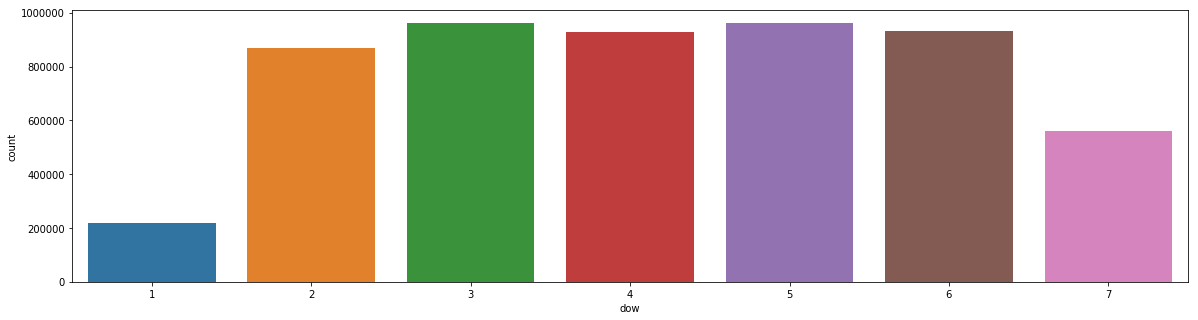

In [16]:
df3=df2.select('dow').groupBy('dow').count().sort('dow',ascending=True)
df_dow = df3.toPandas()
plt.figure(figsize=(20,5))
sns.barplot(x="dow", y='count', data=df_dow)
plt.show()

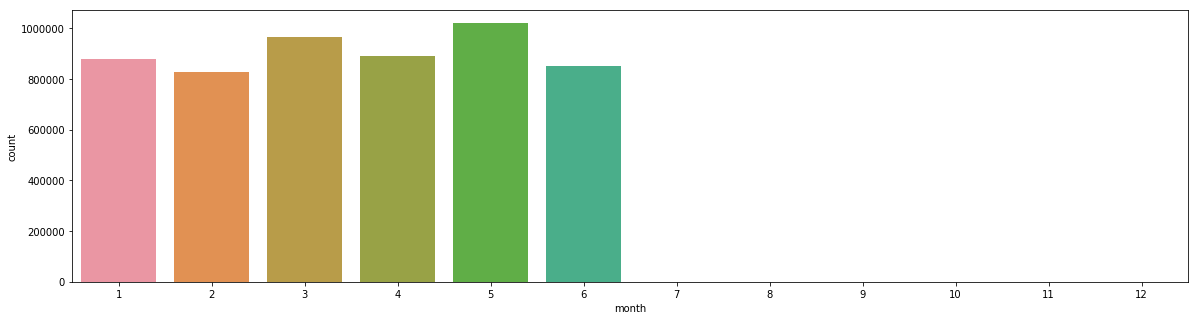

In [18]:
df3=df2.select('month').groupBy('month').count().sort('month',ascending=True)
df_month = df3.toPandas()
plt.figure(figsize=(20,5))
sns.barplot(x="month", y='count', data=df_month)
plt.show()

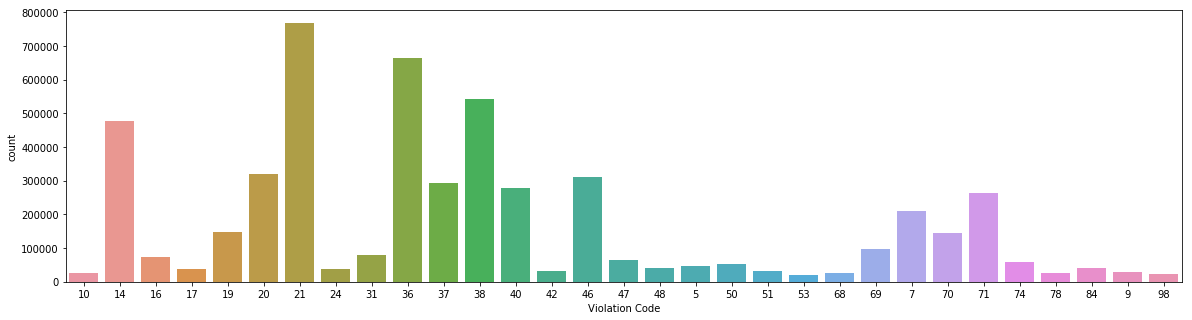

In [31]:
df3=df2.select('Violation Code').groupBy('Violation Code').count().sort('count',ascending=False)
df_violation =df3.toPandas()
plt.figure(figsize=(20,5))
sns.barplot(x="Violation Code", y='count', data=df_violation.loc[:30])
plt.show()

In [22]:
df_violation

,Violation Code,count
0,21,768087
1,36,662765
2,38,542079
3,14,476664
4,20,319646
5,46,312330
6,37,293147
7,40,277184
8,71,263393
9,7,210176


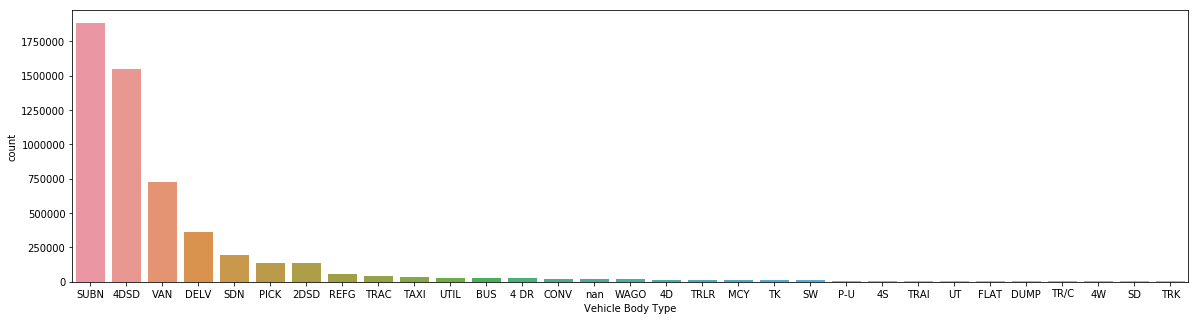

In [30]:
df3=df2.select('Vehicle Body Type').groupBy('Vehicle Body Type').count().sort('count',ascending=False)
df_vb =df3.toPandas()
plt.figure(figsize=(20,5))
sns.barplot(x="Vehicle Body Type", y='count', data=df_vb.loc[:30])
plt.show()

In [32]:
df_vb

,Vehicle Body Type,count
0,SUBN,1883954
1,4DSD,1547312
2,VAN,724029
3,DELV,358984
4,SDN,194197
5,PICK,135772
6,2DSD,135707
7,REFG,59641
8,TRAC,40030
9,TAXI,32608


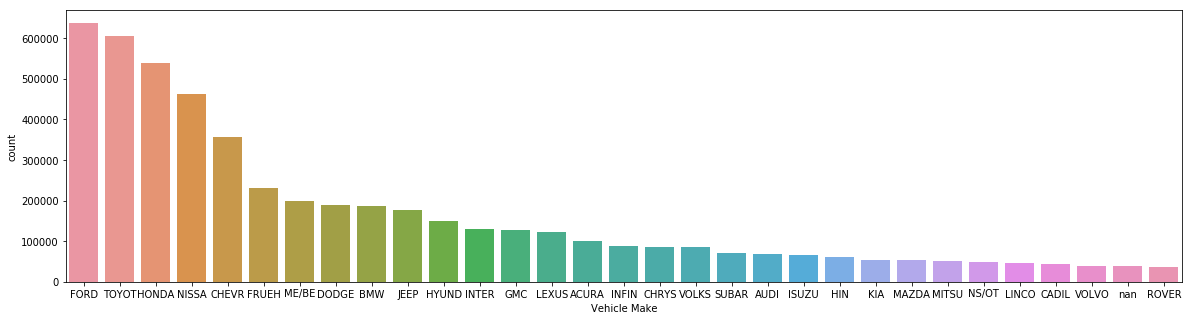

In [34]:
df3=df2.select('Vehicle Make').groupBy('Vehicle Make').count().sort('count',ascending=False)
df_vm =df3.toPandas()
plt.figure(figsize=(20,5))
sns.barplot(x="Vehicle Make", y='count', data=df_vm.loc[:30])
plt.show()

In [28]:
df_vm

,Vehicle Make,count
0,FORD,636844
1,TOYOT,605291
2,HONDA,538884
3,NISSA,462017
4,CHEVR,356032
5,FRUEH,230787
6,ME/BE,197568
7,DODGE,187729
8,BMW,186700
9,JEEP,175815


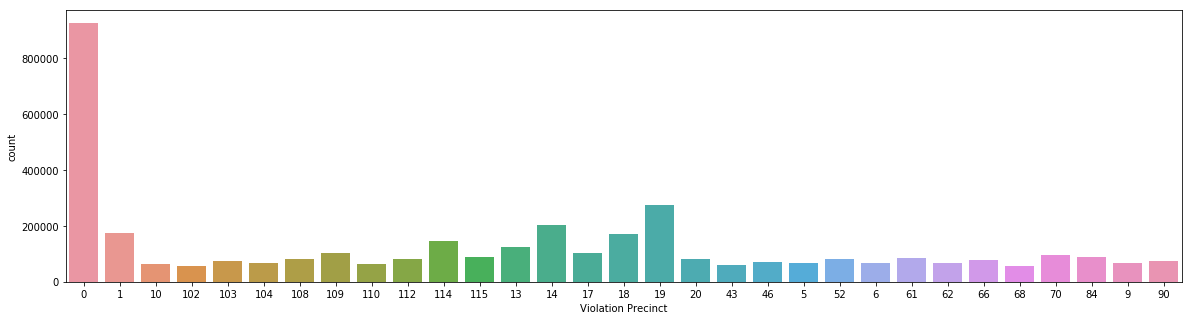

In [36]:
df3=df2.select('Violation Precinct').groupBy('Violation Precinct').count().sort('count',ascending=False)
df_vp =df3.toPandas()
plt.figure(figsize=(20,5))
sns.barplot(x="Violation Precinct", y='count', data=df_vp.loc[:30])
plt.show()

In [ ]:
df_vp

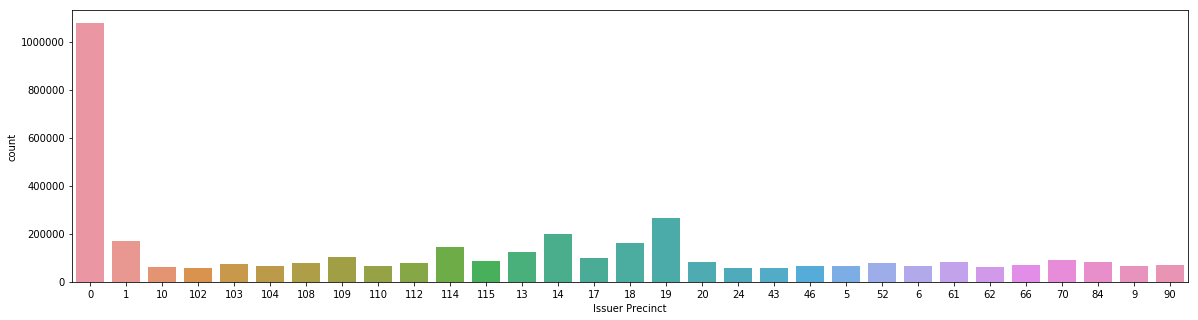

In [37]:
df3=df2.select('Issuer Precinct').groupBy('Issuer Precinct').count().sort('count',ascending=False)
df_ip =df3.toPandas()
plt.figure(figsize=(20,5))
sns.barplot(x="Issuer Precinct", y='count', data=df_ip.loc[:30])
plt.show()

In [38]:
df_ip

,Issuer Precinct,count
0,0,1078406
1,19,266961
2,14,200495
3,1,168740
4,18,162994
5,114,144054
6,13,122490
7,109,105109
8,17,100641
9,70,92298


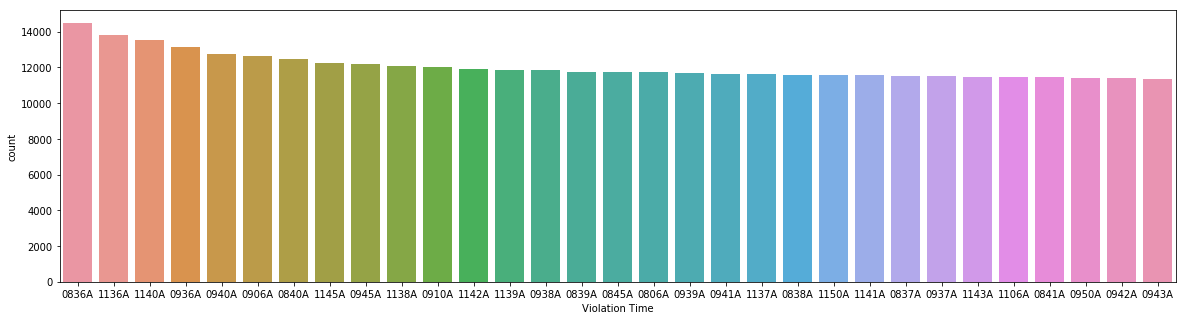

In [40]:
#df3=df2.select('Violation Time').groupBy('Violation Time').count().sort('count',ascending=False)
df_vt =df3.toPandas()
plt.figure(figsize=(20,5))
sns.barplot(x="Violation Time", y='count', data=df_vt.loc[:30])
plt.show()

In [41]:
df_vt

,Violation Time,count
0,0836A,14492
1,1136A,13808
2,1140A,13546
3,0936A,13128
4,0940A,12763
5,0906A,12641
6,0840A,12497
7,1145A,12235
8,0945A,12193
9,1138A,12077


In [73]:
df2.select('Plate ID', 'Registration State').groupBy('Plate ID', 'Registration State').count().sort('count',ascending=False).show()

+----------+------------------+-----+
|  Plate ID|Registration State|count|
+----------+------------------+-----+
|BLANKPLATE|Registration State| 5261|
|   96089MA|Registration State|  529|
|   96087MA|Registration State|  528|
|   94905JA|Registration State|  527|
|   14828MJ|Registration State|  526|
|   85848MD|Registration State|  511|
|   30954JX|Registration State|  510|
|   2121796|                IN|  505|
|   16242TC|Registration State|  496|
|   77116MA|Registration State|  492|
|   47603MD|Registration State|  492|
|   2194153|                IN|  485|
|   12359MG|Registration State|  474|
|   16208TC|Registration State|  468|
|   49731MA|Registration State|  464|
|   14829MJ|Registration State|  460|
|   49331KA|Registration State|  458|
|    XEEF98|                NJ|  457|
|   66103JR|Registration State|  452|
|   49282KA|Registration State|  451|
+----------+------------------+-----+
only showing top 20 rows



In [29]:
df3.groupBy('Registration State').count().sort('count',ascending=False).show()

df3.replace(["99","NY"], 'Registration State')

#df3.select('Registration State').distinct().show()

DataFrame[Registration State: string, year: int, month: int, dom: int, dow: int, Violation Code: string, Vehicle Body Type: string, Vehicle Make: string, Violation Precinct: string, Issuer Precinct: string]

In [36]:
df3.select('Issue Date').distinct().count()

365

In [38]:
df3.select('Issue Date').distinct().show()

+----------+
|Issue Date|
+----------+
|2017-05-14|
|2017-12-05|
|2017-05-11|
|2017-02-24|
|2017-10-20|
|2017-12-22|
|2017-08-18|
|2017-04-30|
|2017-09-12|
|2017-05-18|
|2017-03-08|
|2017-09-26|
|2017-03-18|
|2017-10-01|
|2017-10-12|
|2017-10-31|
|2017-12-03|
|2017-09-15|
|2017-12-08|
|2017-04-19|
+----------+
only showing top 20 rows



In [ ]:
#test.select('Product_ID').subtract(train.select('Product_ID'))